In [86]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np

# EM

### MSstats

In [87]:
# Protein.Expression <- quantms.proposed$ProteinLevelData[, c('Protein', 'LogIntensities', 'GROUP', 'SUBJECT')]
# 第109和139次运行

quantms_em_protein_expression = pd.read_csv("./MSstats_output-quantms-EM-proteinIntensity.csv", header=0, sep=",")

msstats_em_cv = pd.DataFrame(None,columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3', 'BioRep4', 'BioRep5', 'BioRep6', 'Type', "CV[%]", "Condition"])
for condition, group_condition in quantms_em_protein_expression.groupby("GROUP"):
    for protein, t_sum in group_condition.groupby("Protein"):
        if len(t_sum) <= 3:
            continue
        BioRep1 = np.NaN
        BioRep2 = np.NaN
        BioRep3 = np.NaN
        BioRep4 = np.NaN
        BioRep5 = np.NaN
        BioRep6 = np.NaN
        for _, row in t_sum.iterrows():
            if row["SUBJECT"] == 1 or row["SUBJECT"] == 7:
                BioRep1 = np.exp2(row["LogIntensities"])
            elif row["SUBJECT"] == 2 or row["SUBJECT"] == 8:
                BioRep2 = np.exp2(row["LogIntensities"])
            elif row["SUBJECT"] == 3 or row["SUBJECT"] == 9:
                BioRep3 = np.exp2(row["LogIntensities"])
            elif row["SUBJECT"] == 4 or row["SUBJECT"] == 10:
                BioRep4 = np.exp2(row["LogIntensities"])
            elif row["SUBJECT"] == 5 or row["SUBJECT"] == 11:
                BioRep5 = np.exp2(row["LogIntensities"])
            elif row["SUBJECT"] == 6 or row["SUBJECT"] == 12:
                BioRep6 = np.exp2(row["LogIntensities"])

        mean = np.nanmean([BioRep1, BioRep2, BioRep3, BioRep4, BioRep5, BioRep6])
        std = np.nanstd([BioRep1, BioRep2, BioRep3, BioRep4, BioRep5, BioRep6])
        msstats_em_cv = msstats_em_cv.append({'ProteinName': protein,'BioRep1':BioRep1, 
                       'BioRep2': BioRep2, 'BioRep3': BioRep3, "BioRep4": BioRep4, "BioRep5": BioRep5, "BioRep6": BioRep6,
                                        "CV[%]": 100 * (std / mean), "Type": "MSstats", "Condition": condition}, ignore_index=True)

### Proteus

In [88]:
import re

prodatmed = pd.read_csv("./proteus-quantms-EM-proteinIntensity.csv", index_col=0)

def return_ms_runs(row):
    if "BaP" in row["MS runs"]:
        return re.findall("\d", row["MS runs"])[0]
    else:
        return int(re.findall("\d", row["MS runs"])[0]) + 6

prodatmed = prodatmed.reset_index() #将索引转化为Series
prodatmed_long = prodatmed.melt(id_vars=["index"])
prodatmed_long.rename(columns={"index": "ProteinName", "variable": "MS runs", "value": "Intensity"}, inplace=True)
prodatmed_long.dropna(how="any", inplace=True)
prodatmed_long["LogIntensities"] = prodatmed_long.apply(lambda x: np.log2(x["Intensity"]), axis=1)
prodatmed_long["SUBJECT"] = prodatmed_long.apply(lambda x: return_ms_runs(x), axis=1)

In [89]:
prodatmed_long["Condition"] = prodatmed_long.apply(lambda x: "BaP" if x["MS runs"].split("_")[0] == "BaP" else "Control", axis=1)

for condition, group_condition in prodatmed_long.groupby("Condition"):
    for protein, t_sum in group_condition.groupby("ProteinName"):
        if len(t_sum) <= 3:
            continue
        BioRep1 = np.NaN
        BioRep2 = np.NaN
        BioRep3 = np.NaN
        BioRep4 = np.NaN
        BioRep5 = np.NaN
        BioRep6 = np.NaN
        for _, row in t_sum.iterrows():
            if str(row["SUBJECT"]) == "1" or str(row["SUBJECT"]) == "7":
                BioRep1 = row["Intensity"]
            elif str(row["SUBJECT"]) == "2" or str(row["SUBJECT"]) == "8":
                BioRep2 = row["Intensity"]
            elif str(row["SUBJECT"]) == "3" or str(row["SUBJECT"]) == "9":
                BioRep3 = row["Intensity"]
            elif str(row["SUBJECT"]) == "4" or str(row["SUBJECT"]) == "10":
                BioRep4 = row["Intensity"]
            elif str(row["SUBJECT"]) == "5" or str(row["SUBJECT"]) == "11":
                BioRep5 = row["Intensity"]
            elif str(row["SUBJECT"]) == "6" or str(row["SUBJECT"]) == "12":
                BioRep6 = row["Intensity"]

        mean = np.nanmean([BioRep1, BioRep2, BioRep3, BioRep4, BioRep5, BioRep6])
        std = np.nanstd([BioRep1, BioRep2, BioRep3, BioRep4, BioRep5, BioRep6])
        msstats_em_cv = msstats_em_cv.append({'ProteinName': protein,'BioRep1':BioRep1, 
                       'BioRep2': BioRep2, 'BioRep3': BioRep3, "BioRep4": BioRep4, "BioRep5": BioRep5, "BioRep6": BioRep6,
                                        "CV[%]": 100 * (std / mean), "Type": "Proteus", "Condition": condition}, ignore_index=True)


### msqrob2

In [90]:
msqrob2 = pd.read_csv("msqrob2-protein-intensity-CM.csv")
msqrob2 = msqrob2.melt(id_vars="ProteinName")
def put_condition(v):
    if v == "sumIntensity_1" or v == "sumIntensity_2" or v == "sumIntensity_3" or v == "sumIntensity_4"or v == "sumIntensity_5"or v == "sumIntensity_6":
        return "BaP"
    else:
        return "Control"

def convert_variable(v):
    if v == "sumIntensity_1" or v == "sumIntensity_7":
        return "BioRep1"
    elif v == "sumIntensity_2" or v == "sumIntensity_8":
        return "BioRep2"
    elif v == "sumIntensity_3" or  v == "sumIntensity_9":
        return "BioRep3"
    elif v == "sumIntensity_4" or v == "sumIntensity_10":
        return "BioRep4"
    elif v == "sumIntensity_5" or  v == "sumIntensity_11":
        return "BioRep5"
    else:
        return "BioRep6"
    
msqrob2["Condition"] = msqrob2.apply(lambda x: put_condition(x["variable"]) ,axis=1)
msqrob2["variable"] = msqrob2.apply(lambda x: convert_variable(x["variable"]) ,axis=1)

msqrob2 = msqrob2.pivot_table(index=["ProteinName", "Condition"], columns=["variable"], values="value").reset_index()
msqrob2.dropna(thresh=3, subset=["BioRep1", "BioRep2","BioRep3", "BioRep4", "BioRep5", "BioRep6"], inplace=True, axis=0)

In [91]:
def get_cv(row):
    t = 100*np.nanstd([row["BioRep1"],row["BioRep2"], row["BioRep3"],row["BioRep4"],row["BioRep5"],row["BioRep6"]]) /abs(np.nanmean([row["BioRep1"],row["BioRep2"],row["BioRep3"],row["BioRep4"], row["BioRep5"],row["BioRep6"]]))
    return t
        
msqrob2["CV[%]"] =  msqrob2.apply(lambda r: get_cv(r), axis=1)
msqrob2["Type"] = "msqrob2"

In [92]:
msstats_em_cv = msstats_em_cv.append(msqrob2)

# 删除行中带有负数的行
msstats_em_cv = msstats_em_cv[msstats_em_cv.select_dtypes(include=[np.number]).ge(0).all(1)]

In [93]:
msstats_em_cv.head()

,ProteinName,BioRep1,BioRep2,BioRep3,BioRep4,BioRep5,BioRep6,Type,CV[%],Condition
1,sp|A0AVT1|UBA6_HUMAN,1.387316e+07,1.509477e+07,1.273240e+07,1.229358e+07,1.524948e+07,1.098726e+07,MSstats,11.424758,BaP
2,sp|A0MZ66|SHOT1_HUMAN,3.034678e+07,3.725205e+07,3.968621e+07,3.333317e+07,3.941359e+07,3.593126e+07,MSstats,9.206306,BaP
3,sp|A1L0T0|HACL2_HUMAN,9.249793e+06,1.160886e+07,7.748634e+06,8.140281e+06,1.416431e+07,9.015800e+06,MSstats,22.383086,BaP
4,sp|A2RRP1|NBAS_HUMAN,2.872222e+06,4.144694e+06,2.676477e+06,3.689265e+06,4.606962e+06,3.363183e+06,MSstats,19.013272,BaP
5,sp|A3KMH1|VWA8_HUMAN,6.496285e+06,7.093809e+06,5.464293e+06,5.661025e+06,7.435113e+06,6.364380e+06,MSstats,10.983962,BaP


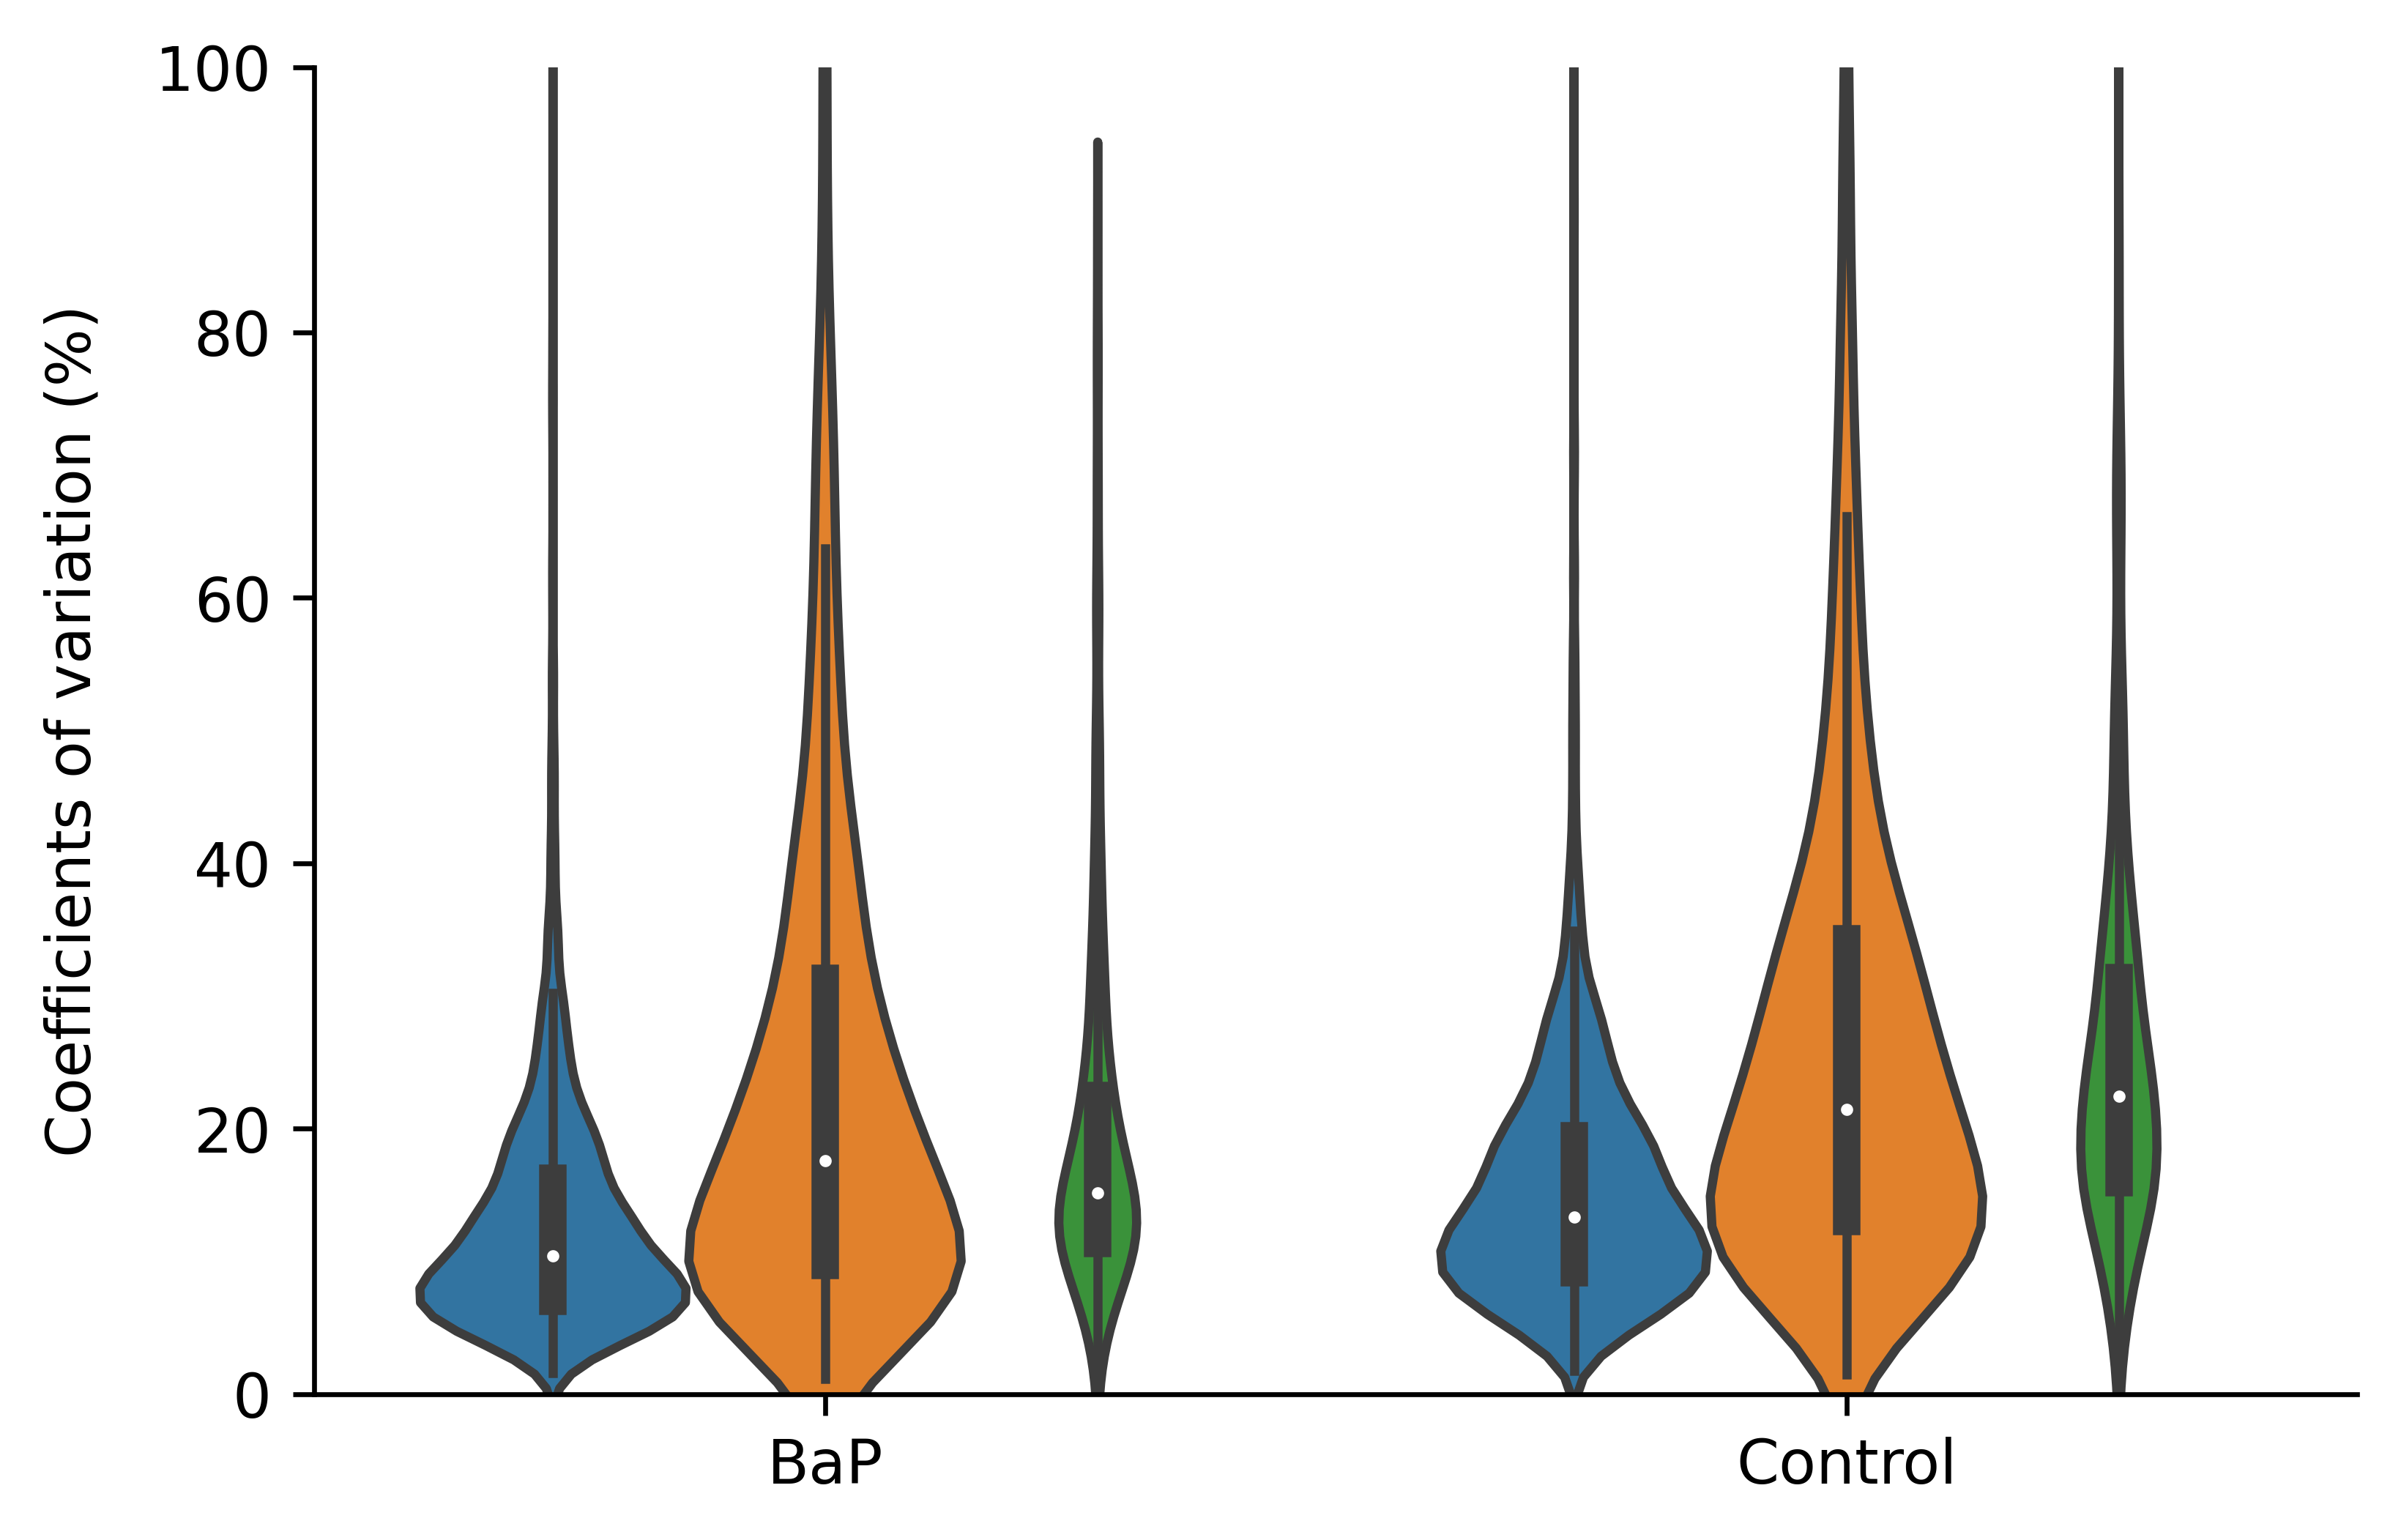

In [94]:
from pandas.api.types import CategoricalDtype

cat_size_order = CategoricalDtype(
    ['BaP', 'Control'], 
    ordered=True
)

msstats_em_cv['Condition'] = msstats_em_cv['Condition'].astype(cat_size_order)


plt.figure(dpi=600)
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(0, 100)

# plt.title("Coefficients of variation (%)")
sns.violinplot(x = "Condition", y="CV[%]", data=msstats_em_cv, scale= "count", hue="Type")
ax.get_legend().remove()
plt.ylabel("Coefficients of variation (%)", labelpad=8.5)
plt.xlabel("", labelpad=8.5)
plt.show()


In [95]:
msstats_em_cv.groupby("Type")["CV[%]"].mean() 

Type
MSstats    13.967912
Proteus    26.435280
msqrob2    22.135732
Name: CV[%], dtype: float64

In [96]:
msstats_em_cv.groupby("Type")["CV[%]"].median()

Type
MSstats    11.980275
Proteus    19.458140
msqrob2    18.359287
Name: CV[%], dtype: float64

# Quantile

### MSstats

In [97]:
quantms_quantile_protein_expression = pd.read_csv("./MSstats_output-quantms-Q-proteinIntensity.csv", header=0, sep=",")

msstats_quantile_cv = pd.DataFrame(None,columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3', 'BioRep4', 'BioRep5', 'BioRep6', 'Type', "CV[%]", "Condition"])
for condition, group_condition in quantms_quantile_protein_expression.groupby("GROUP"):
    for protein, t_sum in group_condition.groupby("Protein"):
        if len(t_sum) <= 3:
            continue
        BioRep1 = np.NaN
        BioRep2 = np.NaN
        BioRep3 = np.NaN
        BioRep4 = np.NaN
        BioRep5 = np.NaN
        BioRep6 = np.NaN
        for _, row in t_sum.iterrows():
            if row["SUBJECT"] == 1 or row["SUBJECT"] == 7:
                BioRep1 = np.exp2(row["LogIntensities"])
            elif row["SUBJECT"] == 2 or row["SUBJECT"] == 8:
                BioRep2 = np.exp2(row["LogIntensities"])
            elif row["SUBJECT"] == 3 or row["SUBJECT"] == 9:
                BioRep3 = np.exp2(row["LogIntensities"])
            elif row["SUBJECT"] == 4 or row["SUBJECT"] == 10:
                BioRep4 = np.exp2(row["LogIntensities"])
            elif row["SUBJECT"] == 5 or row["SUBJECT"] == 11:
                BioRep5 = np.exp2(row["LogIntensities"])
            elif row["SUBJECT"] == 6 or row["SUBJECT"] == 12:
                BioRep6 = np.exp2(row["LogIntensities"])

        mean = np.nanmean([BioRep1, BioRep2, BioRep3, BioRep4, BioRep5, BioRep6])
        std = np.nanstd([BioRep1, BioRep2, BioRep3, BioRep4, BioRep5, BioRep6])
        msstats_quantile_cv = msstats_quantile_cv.append({'ProteinName': protein,'BioRep1':BioRep1, 
                       'BioRep2': BioRep2, 'BioRep3': BioRep3, "BioRep4": BioRep4, "BioRep5": BioRep5, "BioRep6": BioRep6,
                                        "CV[%]": 100 * (std / mean), "Type": "MSstats", "Condition": condition}, ignore_index=True)

### Proteus

In [98]:
import re

prodatquantile = pd.read_csv("./proteus-quantms-Q-proteinIntensity.csv", index_col=0)

def return_ms_runs(row):
    if "BaP" in row["MS runs"]:
        return re.findall("\d", row["MS runs"])[0]
    else:
        return int(re.findall("\d", row["MS runs"])[0]) + 6

prodatmed = prodatmed.reset_index() #将索引转化为Series
prodatmed_long = prodatmed.melt(id_vars=["index"])
prodatmed_long.rename(columns={"index": "ProteinName", "variable": "MS runs", "value": "Intensity"}, inplace=True)
prodatmed_long.dropna(how="any", inplace=True)
prodatmed_long["LogIntensities"] = prodatmed_long.apply(lambda x: np.log2(x["Intensity"]), axis=1)
prodatmed_long["SUBJECT"] = prodatmed_long.apply(lambda x: return_ms_runs(x), axis=1)

<ipython-input-98-33754b829da3>:15: RuntimeWarning: divide by zero encountered in log2
  prodatmed_long["LogIntensities"] = prodatmed_long.apply(lambda x: np.log2(x["Intensity"]), axis=1)


In [99]:
prodatmed_long["Condition"] = prodatmed_long.apply(lambda x: "BaP" if x["MS runs"].split("_")[0] == "BaP" else "Control", axis=1)

for condition, group_condition in prodatmed_long.groupby("Condition"):
    for protein, t_sum in group_condition.groupby("ProteinName"):
        if len(t_sum) <= 3:
            continue
        BioRep1 = np.NaN
        BioRep2 = np.NaN
        BioRep3 = np.NaN
        BioRep4 = np.NaN
        BioRep5 = np.NaN
        BioRep6 = np.NaN
        for _, row in t_sum.iterrows():
            if str(row["SUBJECT"]) == "1" or str(row["SUBJECT"]) == "7":
                BioRep1 = row["Intensity"]
            elif str(row["SUBJECT"]) == "2" or str(row["SUBJECT"]) == "8":
                BioRep2 = row["Intensity"]
            elif str(row["SUBJECT"]) == "3" or str(row["SUBJECT"]) == "9":
                BioRep3 = row["Intensity"]
            elif str(row["SUBJECT"]) == "4" or str(row["SUBJECT"]) == "10":
                BioRep4 = row["Intensity"]
            elif str(row["SUBJECT"]) == "5" or str(row["SUBJECT"]) == "11":
                BioRep5 = row["Intensity"]
            elif str(row["SUBJECT"]) == "6" or str(row["SUBJECT"]) == "12":
                BioRep6 = row["Intensity"]

        mean = np.nanmean([BioRep1, BioRep2, BioRep3, BioRep4, BioRep5, BioRep6])
        std = np.nanstd([BioRep1, BioRep2, BioRep3, BioRep4, BioRep5, BioRep6])
        msstats_quantile_cv = msstats_quantile_cv.append({'ProteinName': protein,'BioRep1':BioRep1, 
                       'BioRep2': BioRep2, 'BioRep3': BioRep3, "BioRep4": BioRep4, "BioRep5": BioRep5, "BioRep6": BioRep6,
                                        "CV[%]": 100 * (std / mean), "Type": "Proteus", "Condition": condition}, ignore_index=True)


### msqrob2

In [100]:
msqrob2 = pd.read_csv("msqrob2-protein-intensity-Q.csv")
msqrob2 = msqrob2.melt(id_vars="ProteinName")
def put_condition(v):
    if v == "sumIntensity_1" or v == "sumIntensity_2" or v == "sumIntensity_3" or v == "sumIntensity_4"or v == "sumIntensity_5"or v == "sumIntensity_6":
        return "BaP"
    else:
        return "Control"

def convert_variable(v):
    if v == "sumIntensity_1" or v == "sumIntensity_7":
        return "BioRep1"
    elif v == "sumIntensity_2" or v == "sumIntensity_8":
        return "BioRep2"
    elif v == "sumIntensity_3" or  v == "sumIntensity_9":
        return "BioRep3"
    elif v == "sumIntensity_4" or v == "sumIntensity_10":
        return "BioRep4"
    elif v == "sumIntensity_5" or  v == "sumIntensity_11":
        return "BioRep5"
    else:
        return "BioRep6"
    
msqrob2["Condition"] = msqrob2.apply(lambda x: put_condition(x["variable"]) ,axis=1)
msqrob2["variable"] = msqrob2.apply(lambda x: convert_variable(x["variable"]) ,axis=1)

msqrob2 = msqrob2.pivot_table(index=["ProteinName", "Condition"], columns=["variable"], values="value").reset_index()
msqrob2.dropna(thresh=3, subset=["BioRep1", "BioRep2","BioRep3", "BioRep4", "BioRep5", "BioRep6"], inplace=True, axis=0)

In [101]:
def get_cv(row):
    t = 100*np.nanstd([row["BioRep1"],row["BioRep2"], row["BioRep3"],row["BioRep4"],row["BioRep5"],row["BioRep6"]]) /abs(np.nanmean([row["BioRep1"],row["BioRep2"],row["BioRep3"],row["BioRep4"], row["BioRep5"],row["BioRep6"]]))
    return t
        
msqrob2["CV[%]"] =  msqrob2.apply(lambda r: get_cv(r), axis=1)
msqrob2["Type"] = "msqrob2"

In [102]:
msstats_quantile_cv = msstats_quantile_cv.append(msqrob2)

# 删除行中带有负数的行
msstats_quantile_cv = msstats_quantile_cv[msstats_quantile_cv.select_dtypes(include=[np.number]).ge(0).all(1)]

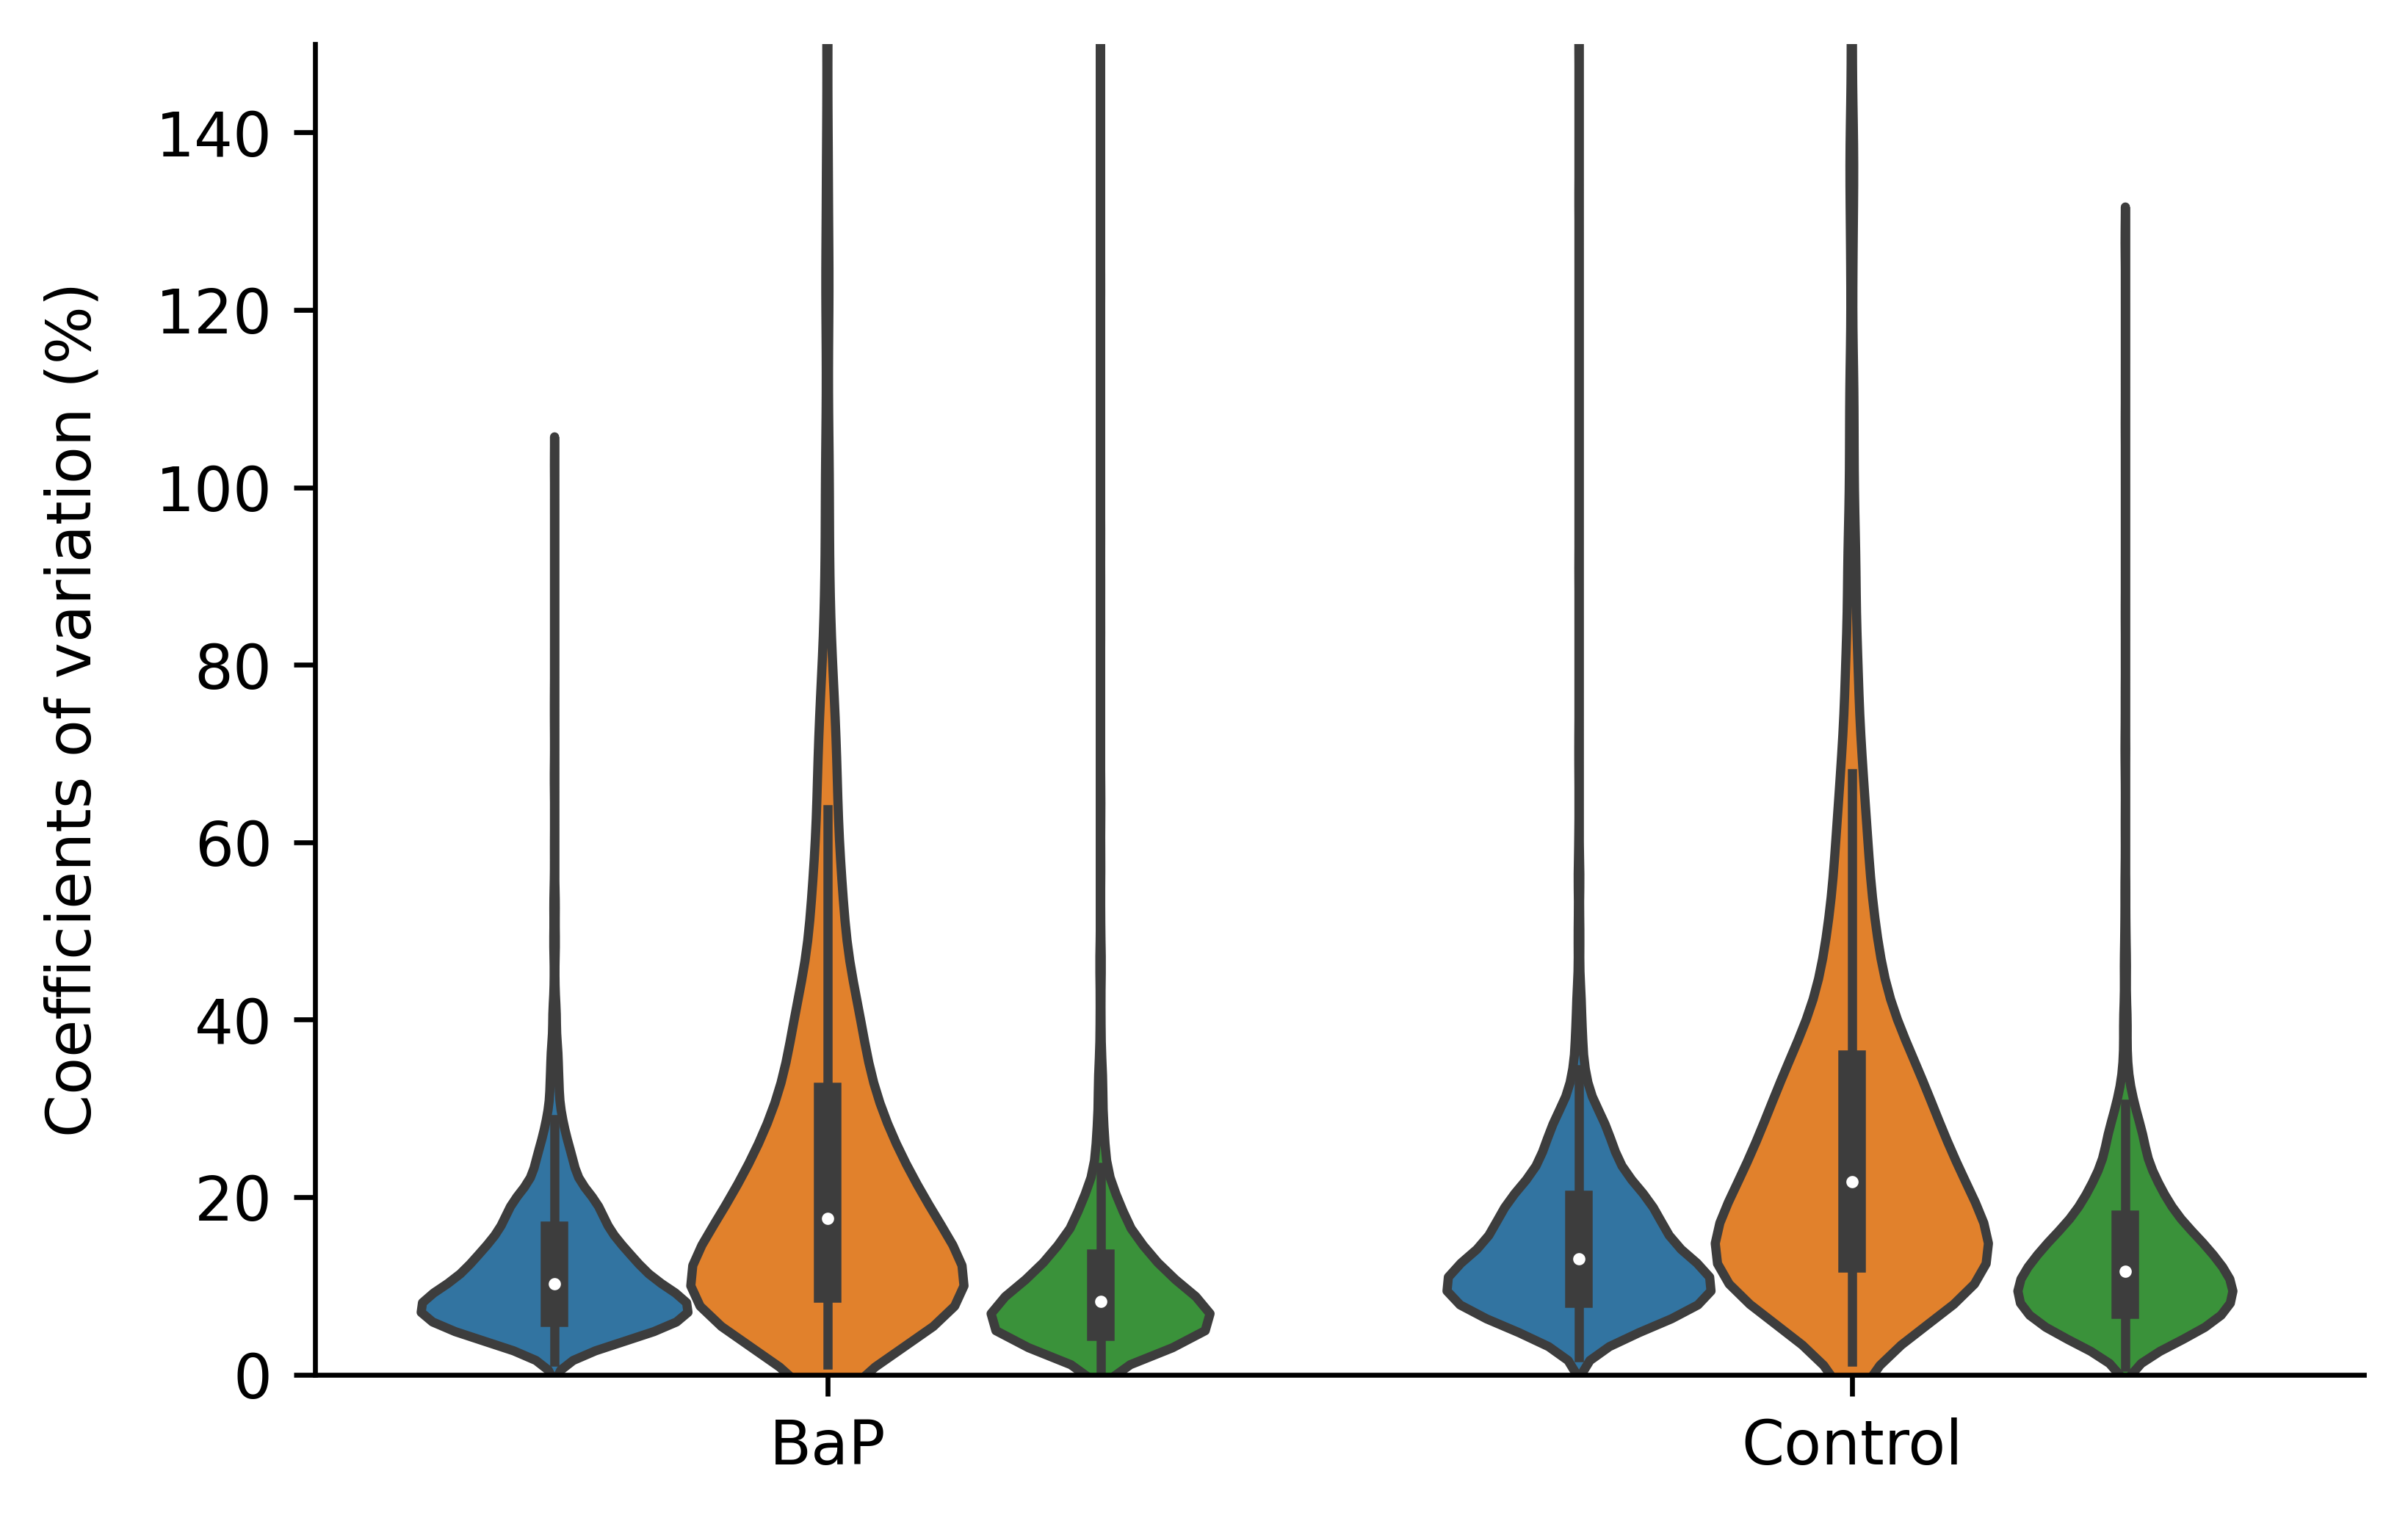

In [103]:
from pandas.api.types import CategoricalDtype

cat_size_order = CategoricalDtype(
    ['BaP', 'Control'],  
    ordered=True
)

msstats_quantile_cv['Condition'] = msstats_quantile_cv['Condition'].astype(cat_size_order)


plt.figure(dpi=600)
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(0, 150)

# plt.title("Coefficients of variation (%)")
sns.violinplot(x = "Condition", y="CV[%]", data=msstats_quantile_cv, scale= "count", hue="Type")
ax.get_legend().remove()
plt.ylabel("Coefficients of variation (%)", labelpad=8.5)
plt.xlabel("", labelpad=8.5)
plt.show()


In [104]:
msstats_quantile_cv.groupby("Type")["CV[%]"].mean() 

Type
MSstats    13.585658
Proteus    26.688785
msqrob2    11.679396
Name: CV[%], dtype: float64

In [105]:
msstats_quantile_cv.groupby("Type")["CV[%]"].median()

Type
MSstats    11.663699
Proteus    19.570989
msqrob2     9.788437
Name: CV[%], dtype: float64

# NN

### MSstats

In [106]:
quantms_NN_protein_expression = pd.read_csv("./MSstats_output-quantms-NN-proteinIntensity.csv", header=0, sep=",")

msstats_nn_cv = pd.DataFrame(None,columns = ['ProteinName','BioRep1','BioRep2', 'BioRep3', 'BioRep4', 'BioRep5', 'BioRep6', 'Type', "CV[%]", "Condition"])
for condition, group_condition in quantms_NN_protein_expression.groupby("GROUP"):
    for protein, t_sum in group_condition.groupby("Protein"):
        if len(t_sum) <= 3:
            continue
        BioRep1 = np.NaN
        BioRep2 = np.NaN
        BioRep3 = np.NaN
        BioRep4 = np.NaN
        BioRep5 = np.NaN
        BioRep6 = np.NaN
        for _, row in t_sum.iterrows():
            if row["SUBJECT"] == 1 or row["SUBJECT"] == 7:
                BioRep1 = np.exp2(row["LogIntensities"])
            elif row["SUBJECT"] == 2 or row["SUBJECT"] == 8:
                BioRep2 = np.exp2(row["LogIntensities"])
            elif row["SUBJECT"] == 3 or row["SUBJECT"] == 9:
                BioRep3 = np.exp2(row["LogIntensities"])
            elif row["SUBJECT"] == 4 or row["SUBJECT"] == 10:
                BioRep4 = np.exp2(row["LogIntensities"])
            elif row["SUBJECT"] == 5 or row["SUBJECT"] == 11:
                BioRep5 = np.exp2(row["LogIntensities"])
            elif row["SUBJECT"] == 6 or row["SUBJECT"] == 12:
                BioRep6 = np.exp2(row["LogIntensities"])

        mean = np.nanmean([BioRep1, BioRep2, BioRep3, BioRep4, BioRep5, BioRep6])
        std = np.nanstd([BioRep1, BioRep2, BioRep3, BioRep4, BioRep5, BioRep6])
        msstats_nn_cv = msstats_nn_cv.append({'ProteinName': protein,'BioRep1':BioRep1, 
                       'BioRep2': BioRep2, 'BioRep3': BioRep3, "BioRep4": BioRep4, "BioRep5": BioRep5, "BioRep6": BioRep6,
                                        "CV[%]": 100 * (std / mean), "Type": "MSstats", "Condition": condition}, ignore_index=True)

### Proteus

In [107]:
import re

prodatmed = pd.read_csv("./proteus-quantms-NN-proteinIntensity.csv", index_col=0)

def return_ms_runs(row):
    if "BaP" in row["MS runs"]:
        return re.findall("\d", row["MS runs"])[0]
    else:
        return int(re.findall("\d", row["MS runs"])[0]) + 6

prodatmed = prodatmed.reset_index() #将索引转化为Series
prodatmed_long = prodatmed.melt(id_vars=["index"])
prodatmed_long.rename(columns={"index": "ProteinName", "variable": "MS runs", "value": "Intensity"}, inplace=True)
prodatmed_long.dropna(how="any", inplace=True)
prodatmed_long["LogIntensities"] = prodatmed_long.apply(lambda x: np.log2(x["Intensity"]), axis=1)
prodatmed_long["SUBJECT"] = prodatmed_long.apply(lambda x: return_ms_runs(x), axis=1)

In [108]:
prodatmed_long["Condition"] = prodatmed_long.apply(lambda x: "BaP" if x["MS runs"].split("_")[0] == "BaP" else "Control", axis=1)

for condition, group_condition in prodatmed_long.groupby("Condition"):
    for protein, t_sum in group_condition.groupby("ProteinName"):
        if len(t_sum) <= 3:
            continue
        BioRep1 = np.NaN
        BioRep2 = np.NaN
        BioRep3 = np.NaN
        BioRep4 = np.NaN
        BioRep5 = np.NaN
        BioRep6 = np.NaN
        for _, row in t_sum.iterrows():
            if str(row["SUBJECT"]) == "1" or str(row["SUBJECT"]) == "7":
                BioRep1 = row["Intensity"]
            elif str(row["SUBJECT"]) == "2" or str(row["SUBJECT"]) == "8":
                BioRep2 = row["Intensity"]
            elif str(row["SUBJECT"]) == "3" or str(row["SUBJECT"]) == "9":
                BioRep3 = row["Intensity"]
            elif str(row["SUBJECT"]) == "4" or str(row["SUBJECT"]) == "10":
                BioRep4 = row["Intensity"]
            elif str(row["SUBJECT"]) == "5" or str(row["SUBJECT"]) == "11":
                BioRep5 = row["Intensity"]
            elif str(row["SUBJECT"]) == "6" or str(row["SUBJECT"]) == "12":
                BioRep6 = row["Intensity"]

        mean = np.nanmean([BioRep1, BioRep2, BioRep3, BioRep4, BioRep5, BioRep6])
        std = np.nanstd([BioRep1, BioRep2, BioRep3, BioRep4, BioRep5, BioRep6])
        msstats_nn_cv = msstats_nn_cv.append({'ProteinName': protein,'BioRep1':BioRep1, 
                       'BioRep2': BioRep2, 'BioRep3': BioRep3, "BioRep4": BioRep4, "BioRep5": BioRep5, "BioRep6": BioRep6,
                                        "CV[%]": 100 * (std / mean), "Type": "Proteus", "Condition": condition}, ignore_index=True)


In [109]:
msstats_nn_cv

,ProteinName,BioRep1,BioRep2,BioRep3,BioRep4,BioRep5,BioRep6,Type,CV[%],Condition
0,sp|A0AV96|RBM47_HUMAN,4.085967e+06,NaN,3.181979e+06,4.242670e+06,4.489924e+06,4.141698e+06,MSstats,11.054083,BaP
1,sp|A0AVT1|UBA6_HUMAN,1.458410e+07,1.881002e+07,1.227145e+07,1.238712e+07,1.987585e+07,1.130984e+07,MSstats,22.342737,BaP
2,sp|A0MZ66|SHOT1_HUMAN,2.928536e+07,4.301637e+07,3.690527e+07,2.935376e+07,4.721912e+07,3.346962e+07,MSstats,18.351583,BaP
3,sp|A1L0T0|HACL2_HUMAN,8.157782e+06,1.275226e+07,5.667492e+06,6.312682e+06,1.613810e+07,8.144270e+06,MSstats,39.061516,BaP
4,sp|A2RRP1|NBAS_HUMAN,2.410132e+06,5.029395e+06,2.303145e+06,3.889569e+06,6.266602e+06,3.576155e+06,MSstats,35.767588,BaP
...,...,...,...,...,...,...,...,...,...,...
14379,sp|Q9Y6V7|DDX49_HUMAN,7.242213e+06,1.207109e+07,8.694217e+06,7.748914e+06,1.217290e+07,1.227738e+07,Proteus,21.745606,Control
14380,sp|Q9Y6W3|CAN7_HUMAN,NaN,8.114287e+06,NaN,1.578920e+07,8.525359e+06,1.405190e+07,Proteus,28.916732,Control
14381,sp|Q9Y6W5|WASF2_HUMAN,2.406790e+07,1.192504e+07,1.380813e+07,1.314686e+07,2.489136e+07,1.616500e+07,Proteus,30.073228,Control
14382,sp|Q9Y6X4|F169A_HUMAN,1.126474e+08,9.390154e+07,9.592291e+07,9.981590e+07,1.117247e+08,1.327057e+08,Proteus,12.314965,Control


### msqrob2

In [110]:
msqrob2 = pd.read_csv("msqrob2-protein-intensity-NN.csv")
msqrob2 = msqrob2.melt(id_vars="ProteinName")
def put_condition(v):
    if v == "sumIntensity_1" or v == "sumIntensity_2" or v == "sumIntensity_3" or v == "sumIntensity_4"or v == "sumIntensity_5"or v == "sumIntensity_6":
        return "BaP"
    else:
        return "Control"

def convert_variable(v):
    if v == "sumIntensity_1" or v == "sumIntensity_7":
        return "BioRep1"
    elif v == "sumIntensity_2" or v == "sumIntensity_8":
        return "BioRep2"
    elif v == "sumIntensity_3" or  v == "sumIntensity_9":
        return "BioRep3"
    elif v == "sumIntensity_4" or v == "sumIntensity_10":
        return "BioRep4"
    elif v == "sumIntensity_5" or  v == "sumIntensity_11":
        return "BioRep5"
    else:
        return "BioRep6"
    
msqrob2["Condition"] = msqrob2.apply(lambda x: put_condition(x["variable"]) ,axis=1)
msqrob2["variable"] = msqrob2.apply(lambda x: convert_variable(x["variable"]) ,axis=1)

msqrob2 = msqrob2.pivot_table(index=["ProteinName", "Condition"], columns=["variable"], values="value").reset_index()
msqrob2.dropna(thresh=3, subset=["BioRep1", "BioRep2","BioRep3", "BioRep4", "BioRep5", "BioRep6"], inplace=True, axis=0)

In [111]:
def get_cv(row):
    t = 100*np.nanstd([row["BioRep1"],row["BioRep2"], row["BioRep3"],row["BioRep4"],row["BioRep5"],row["BioRep6"]]) /abs(np.nanmean([row["BioRep1"],row["BioRep2"],row["BioRep3"],row["BioRep4"], row["BioRep5"],row["BioRep6"]]))
    return t
        
msqrob2["CV[%]"] =  msqrob2.apply(lambda r: get_cv(r), axis=1)
msqrob2["Type"] = "msqrob2"

In [112]:
msstats_nn_cv = msstats_nn_cv.append(msqrob2)

# 删除行中带有负数的行
msstats_nn_cv = msstats_nn_cv[msstats_nn_cv.select_dtypes(include=[np.number]).ge(0).all(1)]

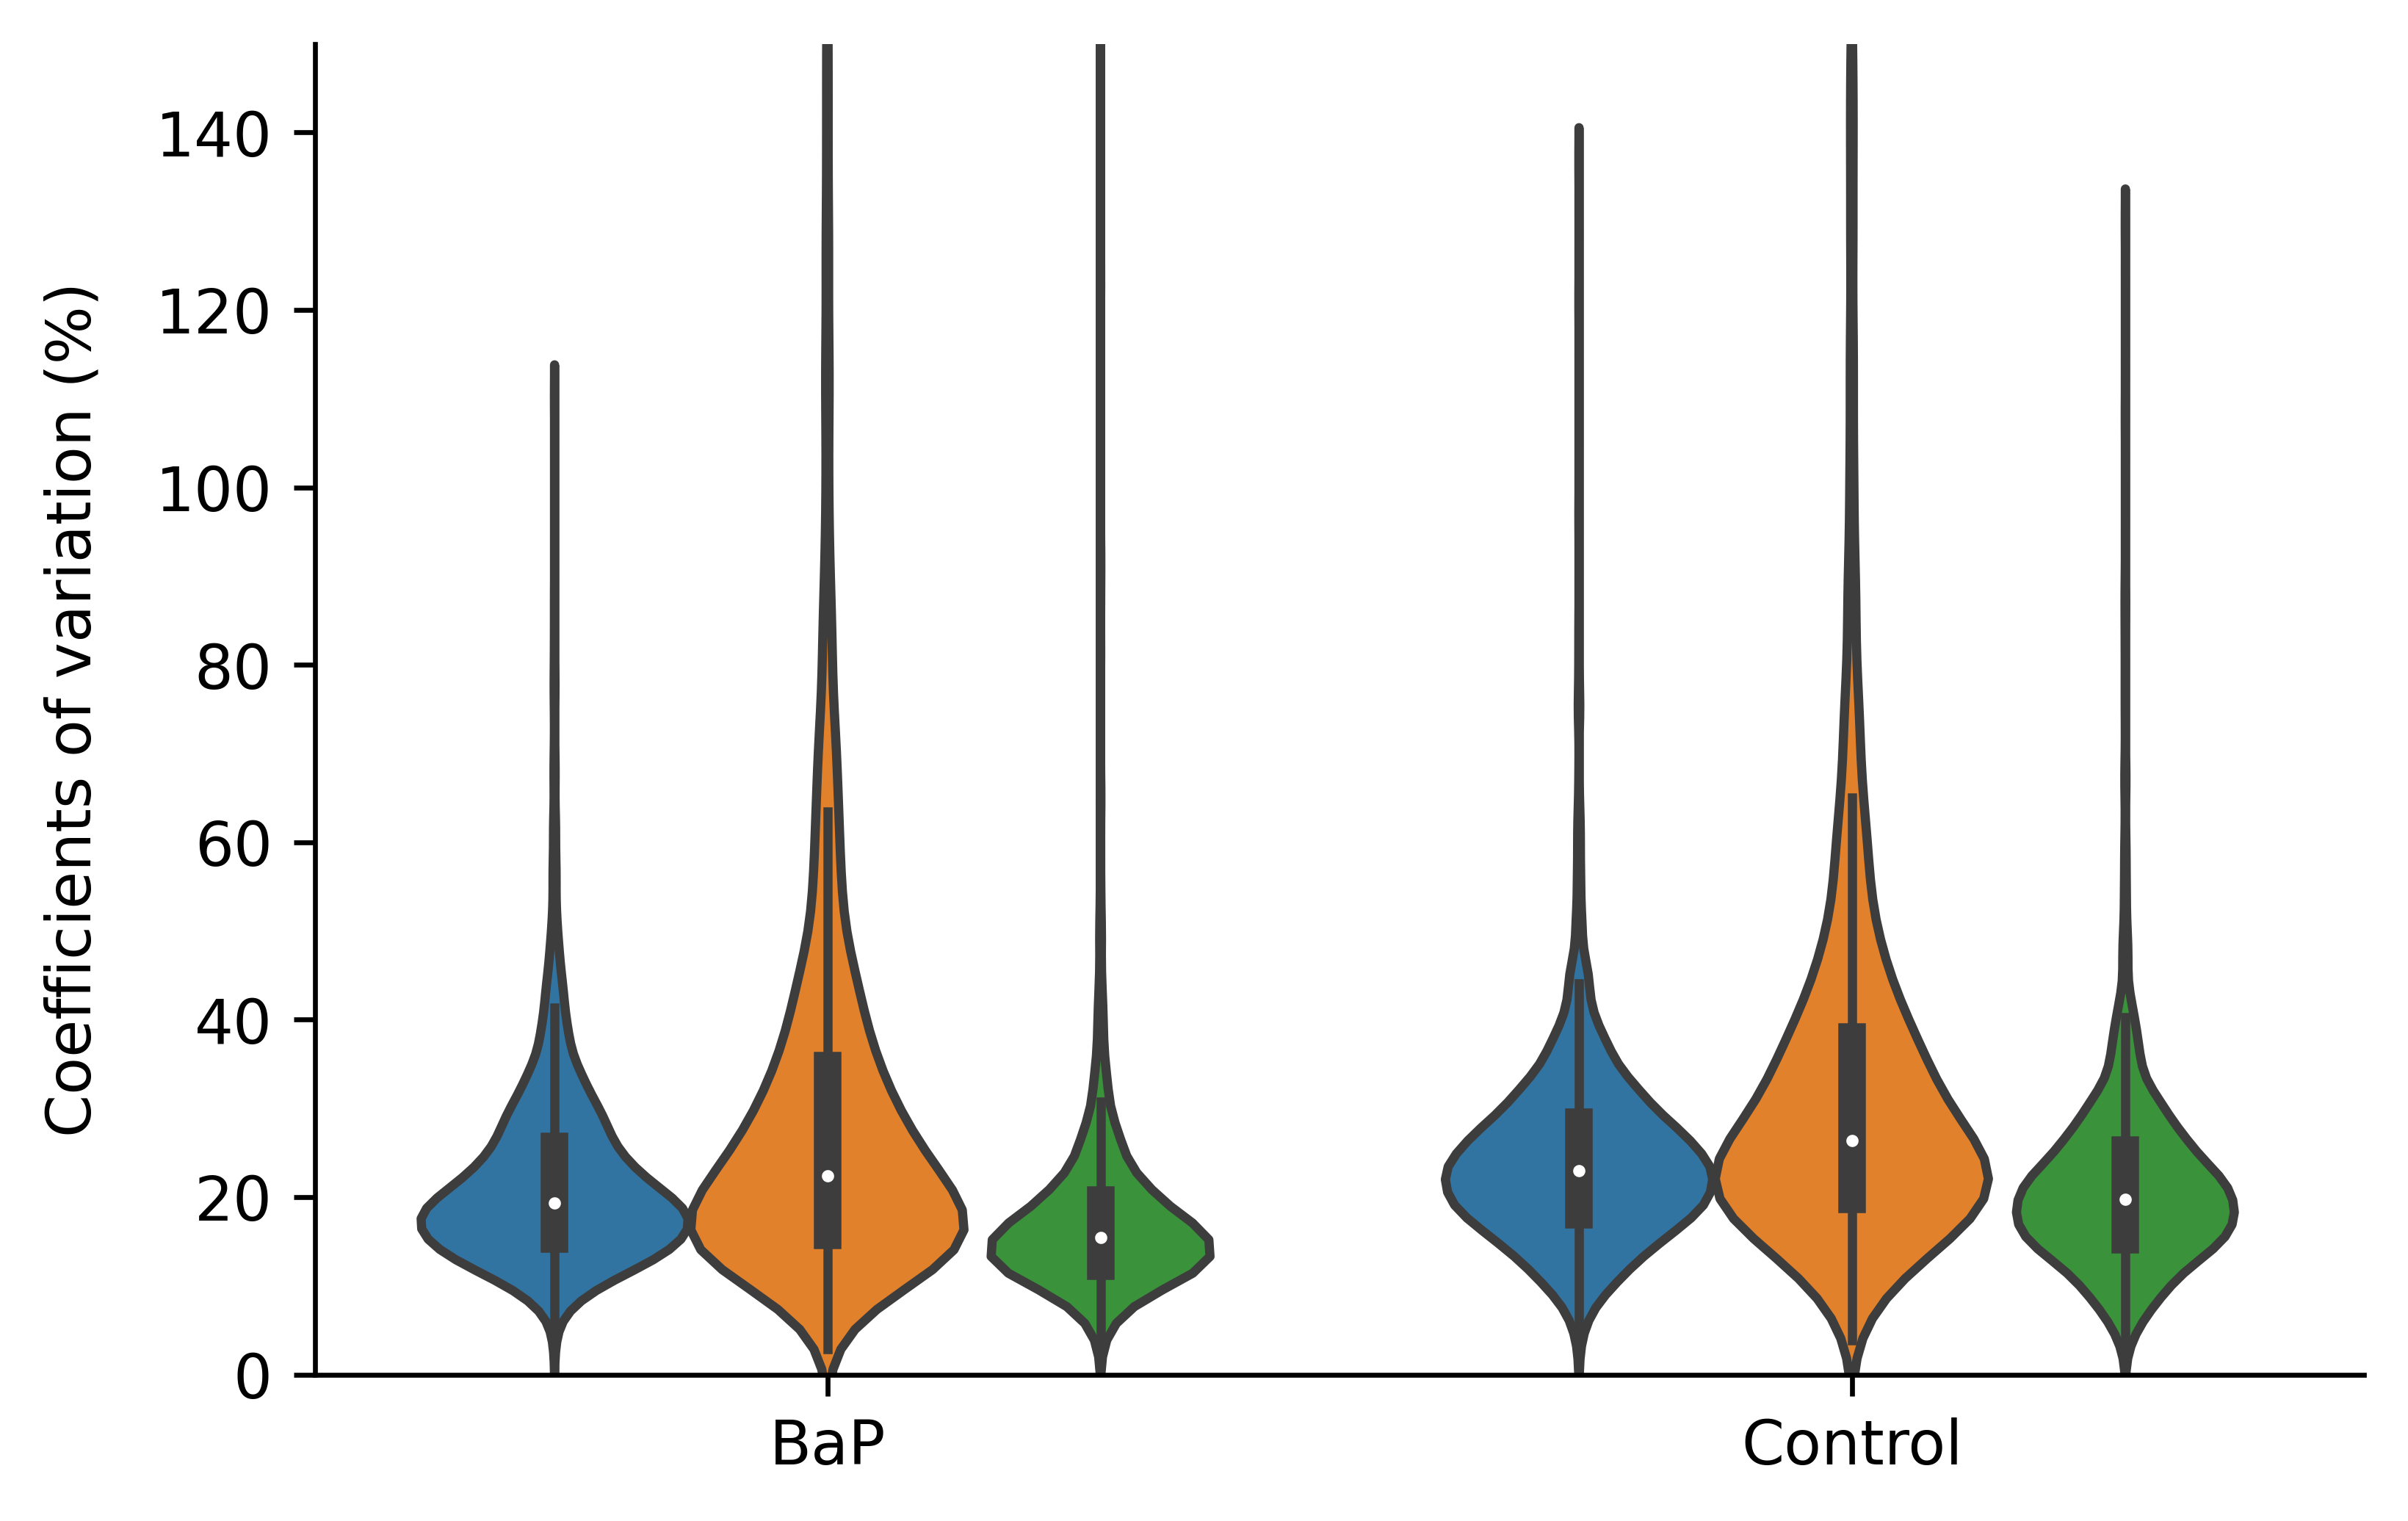

In [113]:
from pandas.api.types import CategoricalDtype

cat_size_order = CategoricalDtype(
    ['BaP', 'Control'],  
    ordered=True
)


msstats_nn_cv['Condition'] = msstats_nn_cv['Condition'].astype(cat_size_order)


#plt.figure(dpi=500, figsize=(8,6))
plt.figure(dpi=600)
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.title("Coefficients of variation (%)")
sns.violinplot(x = "Condition", y="CV[%]", data=msstats_nn_cv, scale= "count", hue="Type")
ax.get_legend().remove()
plt.ylabel("Coefficients of variation (%)", labelpad=8.5)
plt.xlabel("", labelpad=8.5)
plt.ylim(0, 150)
plt.show()


In [114]:
msstats_nn_cv.groupby("Type")["CV[%]"].mean() 

Type
MSstats    22.686977
Proteus    30.979987
msqrob2    18.894599
Name: CV[%], dtype: float64

In [115]:
msstats_nn_cv.groupby("Type")["CV[%]"].median()

Type
MSstats    21.109274
Proteus    24.698318
msqrob2    17.195840
Name: CV[%], dtype: float64